## Exercise in Photogrammetry II
# Ex. 07 Kalman Filter
### Submission: 05.02.2021 
### Points: 20

### A. Bayes Rule
Use the Bayes rule 
$$P(A|B)= \frac{P(B|A)P(A)}{P(B)}$$
to solve following problem:

  Last year 100 students have taken the exam in mathematics.
  50 of them passed the exam. 42 out of these 50 have been doing homeworks.
  There is only one student who did the homeworks but failed the exam.
  
  
**Task**
1.   Find the probability for a student to pass the exam, given he has done all the homeworks. Therefore, solve the following tasks:
    1. Name each of the probabilities $[P(A|B),P(B|A),P(A),P(B)]$ in the context of this task. (2 Points)
      - E.g. P(A|B)= Probabilitiy of ... given ...
    2. Compute the probability for the given values. (2 Points)

In [45]:
# Given statements:
# Probability of passing
p_pass = 50/100
p_homework_pass = 42/50
p_fail = 1 - p_pass
print("Probability of failing is {}".format(p_fail))
p_homework_fail = 1/50
# Using total probility
p_homework = p_homework_pass*p_pass + p_homework_fail * p_fail

print("Probability of doing homework",p_homework)

# Using bayes rule 
p_passing_homework = (p_pass * p_homework_pass)/p_homework

print("Probability of passing given that homework is done", p_passing_homework)


Probability of failing is 0.5
Probability of doing homework 0.43
Probability of passing given that homework is done 0.9767441860465116


### B. Kalman Filter
In the lecture you got to know the Kalman Filter as a realization of the Bayes filter where you assume a linear model and gaussian distributed noise. In this exercise, you need to estimate the height and velocity of a falling object in ${R}^1$ recursively for specific time intervals of $t=1$ seconds.

Assume the initial state of the object to be given by its height $y=95.5$ m and velocity $v=0$ $\frac{m}{s}$ and corresponding uncertainties $\sigma_y^2=0.25$ and $\sigma_v^2=0.05$. We assume a motion with uniform acceleration of $a=1$ $\frac{m}{s^2}$ which we will treat as a control command. In addition, you observe the height of the falling object for five consecutive time steps $z = [96.4, 95.9, 94.4, 87.7, 85.3]$ m with $\sigma_z^2=0.5$.
The covariance of the process noise is given as follwing: 
    $${\Sigma}_t = \begin{pmatrix} 0.1 & 0 \\ 0 & 0.1 \end{pmatrix}$$

**Tasks:**
2. What are the unknows of your state vector $\mathbf{x}_t$? (1 Point)
3. Write down the linear model $\mathbf{x}_t=\mathbf{A}_t\mathbf{x}_{t-1} + \mathbf{B}_t \mathbf{u}_t$ explicitly and print the matrices $\mathbf{A}_t$, $\mathbf{B}_t$ to the terminal. (3 Points)
4. Write down the linear model $\mathbf{z}_t=\mathbf{C}_t \mathbf{x}_t$ explicitly and print the matrix $\mathbf{C}_t$ to the terminal. (2 Points)
5. Recursively estimate the state $\mathbf{x}_t$ of the falling object for five consecutive time steps according to the Kalman Filter.
For each time step visualize the predicted heigth of $\bar{\mathbf{x}}_t$, the observation $\mathbf{z}_t$ and the posteriori state estimate $\mathbf{x}_t$. Plot time steps on the x-axis and height on the y-axis. (6)
6. Assume the measurements of your sensor to be unreliable. This time set the uncertainty $\sigma_z^2=1e^8$ and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter. (2 Points)
7. Assume the measurements of your sensor to be nearly perfect. This time set the uncertainty $\sigma_z^2=1e^{-8}$ and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter. (2 Points)


In [46]:
import numpy as np
#  What are the unknows of your state vector x_t ?
v,y = 0,0
x_t = np.array([[y,v]]).T
print("state matrix",x_t) 

# Write down the linear model x_t = Ax + Bu explicitly and print the matrices A and B to the terminal.
t = 0
a = -1
def A_matrix(t):
    A = np.array([[1, t],
                [0, 1]])
    return A
def B_matrix(t):
    B =np.array([[0.5*(t**2)],
             [t]])
    return B

u_t =np.array([[a]])

print("A is \n {} \n and \n B is \n {}: ".format(A_matrix(t),B_matrix(t)))

# Write the linear model Z = Cx
C = np.array([[1,0]])

P = np.array([[0.25,0],
              [0, 0.05]]) 
Q = np.array([[0.1, 0],
              [0, 0.1]])

R = np.array([[0.5]])
print("C matrix is :\n", C)

state matrix [[0]
 [0]]
A is 
 [[1 0]
 [0 1]] 
 and 
 B is 
 [[0.]
 [0.]]: 
C matrix is :
 [[1 0]]


In [47]:
# Kalman Filter algorithm
def kf(x_init,measurements,P,Q,R):
    x = x_init
    height =[]
    pred_height = []
    for t in range(1,6):
        # predict
        A= A_matrix(t) 
        B = B_matrix(t)
        # print(A,B)
        x_prime = np.dot(A,x) + np.dot(B,u_t)
        P_prime = np.dot(np.dot(A,P),(A.T)) + Q 
        # print(x_prime)
        # print(x_prime.shape,P_prime.shape)
        pred_height.append(x_prime[0][0])
    # 
        # update
        Z= np.array([[measurements[t-1]]])
        # print(Z.shape)
        y = Z - np.dot(C,x_prime)
        # print(y.shape,y)
        S = np.dot(C,np.dot(P_prime,(C.T))) + R
        # print(S,'\n',C,'\n',P_prime)
        # print(S.shape)
        K = np.dot(np.dot(P_prime,C.T), np.linalg.inv(S))
        # print(K.shape)
        x = x_prime + np.dot(K,y)
        P = np.dot((np.eye(2)-np.dot(K,C)),P_prime)
        # print(x)
        height.append(x[0][0])
    return height,pred_height


In [48]:
# For visualization
# Plot time steps on the x-axis and height on the y-axis.
import matplotlib.pyplot as plt
def plot_output(heights,pred_heights,z,name):  
    x = np.array([1, 2, 3, 4,5])
    y = heights
    
    # first plot with X and Y data
    plt.plot(x, y, "-g")
    plt.plot(x, pred_heights, '-.y')
    plt.plot(x, z, '.r')
    
    plt.xlabel("time in seconds")
    plt.ylabel("Distance in metres")
    plt.title(name)
    plt.show()

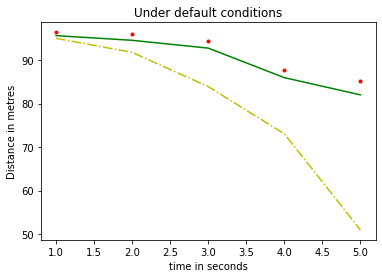

In [49]:
#Recursively estimate the x_t for 5 consecutive time steps

x_init = np.array([[95.5,0]]).T
measurements = [96.4, 95.9, 94.4, 87.7, 85.3]
height, pred_height = kf(x_init,measurements,P,Q,R)
# print(height)
plot_output(height,pred_height,measurements,"Under default conditions")



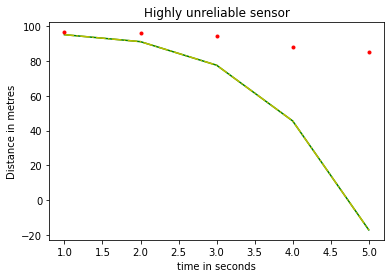

In [50]:
# Assume the measurements of your sensor to be unreliable.
# This time set the uncertainty of sensor = 1e^8 and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter.
R = np.array([[10**8]]) 
height, pred_height = kf(x_init,measurements,P,Q,R)
# print(height)
plot_output(height,pred_height,measurements,"Highly unreliable sensor")

[95.0, 92.74999995625001, 86.94999986518519, 77.5664333315656, 56.1450258837377] [96.399999965, 95.89999995333334, 94.39999993748253, 87.69999994560209, 85.29999989389944]


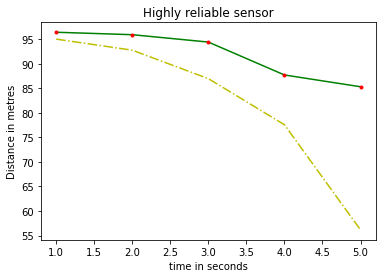

In [51]:
# This time set the uncertainty of sensor = 1e^8 and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter.
R = np.array([[10**(-8)]]) 
height, pred_height = kf(x_init,measurements,P,Q,R)
print(pred_height,height)
plot_output(height,pred_height,measurements,"Highly reliable sensor")